In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score, confusion_matrix

# =========================================================
# 1) Regresión lineal: y = beta0 + beta1*x + ruido
# =========================================================
def make_linear_data(n=120, beta0=2.0, beta1=3.5, x_min=-2.0, x_max=2.0, noise_std=1.0, seed=2909):
    rng = np.random.default_rng(seed)
    x = rng.uniform(x_min, x_max, size=n)
    eps = rng.normal(0.0, noise_std, size=n)
    y = beta0 + beta1 * x + eps
    X = x.reshape(-1, 1)
    return X, y

# =========================================================
# 2) Regresión logística: y ~ Bernoulli(sigmoid(beta0 + b1*x1 + b2*x2))
# =========================================================
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def make_logistic_data(n=300, beta0=-0.3, beta=(2.0, -1.2), x_std=1.0, seed=2909):
    """
    Genera 2 features para poder graficar frontera de decisión.
    """
    rng = np.random.default_rng(seed)
    X = rng.normal(0.0, x_std, size=(n, 2))
    z = beta0 + beta[0] * X[:, 0] + beta[1] * X[:, 1]
    p = sigmoid(z)
    y = rng.binomial(1, p, size=n)
    return X, y, p

In [15]:
# =========================================================
# A) Demo regresión lineal
# =========================================================
X_lin, y_lin = make_linear_data(
    n=120,
    beta0=2.0,
    beta1=3.5,
    x_min=-2.0,
    x_max=2.0,
    noise_std=1.0,
    seed=7
)
#np.ravel(X_lin)
pd.DataFrame({"X":np.ravel(X_lin),"Y":np.ravel(y_lin)})

,X,Y
0,0.500382,3.944082
1,1.588855,7.650300
2,1.102743,5.268571
3,-1.099171,-1.965709
4,-0.799335,-2.795418
...,...,...
115,1.011910,7.566846
116,1.242107,4.954587
117,-1.452944,-2.197401
118,-0.324385,0.775163


=== REGRESIÓN LINEAL ===
Coeficientes estimados: beta0=1.820, beta1=3.562
RMSE train: 0.914
R^2  train: 0.955
RMSE test: 0.954
R^2  test: 0.942


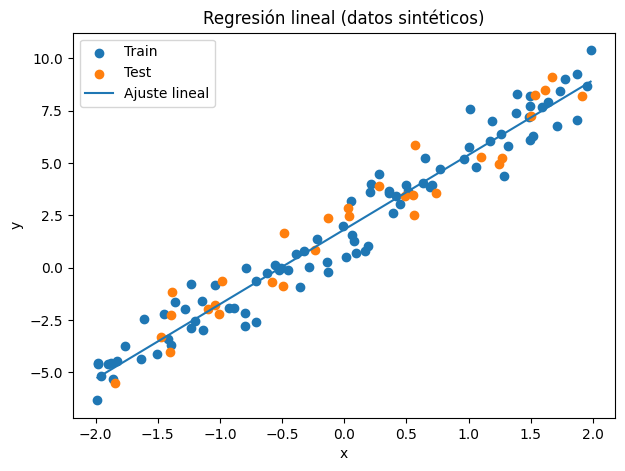

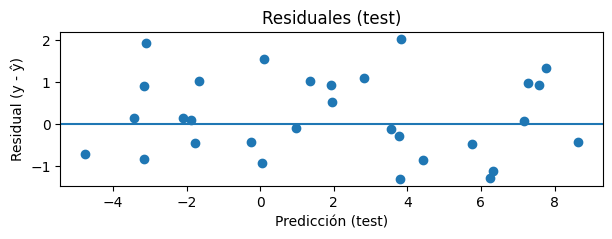

In [ ]:
Xtr, Xte, ytr, yte = train_test_split(X_lin, y_lin, test_size=0.25, random_state=2909)# aqui definimos los conjuntos de train y test

lin_model = LinearRegression() # aqui puedo agregar más parametros si quiero
lin_model.fit(Xtr, ytr) # aqui se entrena el modelo, le estamos diciendo que aprenda la relacion entre Xtr e ytr
yhat_te = lin_model.predict(Xte) # aqui hacemos predicciones sobre el conjunto de test, Xte es el input de las predicciones
# hagamos la prediccion tambien sobre el conjunto de train
yhat_tr = lin_model.predict(Xtr)

print("=== REGRESIÓN LINEAL ===")
print(f"Coeficientes estimados: beta0={lin_model.intercept_:.3f}, beta1={lin_model.coef_[0]:.3f}")
print(f"RMSE train: {np.sqrt(mean_squared_error(ytr, yhat_tr)):.3f}")
print(f"R^2  train: {r2_score(ytr, yhat_tr):.3f}")
print(f"RMSE test: {np.sqrt(mean_squared_error(yte, yhat_te)):.3f}")
print(f"R^2  test: {r2_score(yte, yhat_te):.3f}")

# Gráfica: puntos + recta ajustada con el train set
x_grid = np.linspace(X_lin.min(), X_lin.max(), 100).reshape(-1, 1)
y_grid = lin_model.predict(x_grid)

plt.figure(figsize=(7,5))
plt.scatter(Xtr[:, 0], ytr, label="Train")
plt.scatter(Xte[:, 0], yte, label="Test")
plt.plot(x_grid[:, 0], y_grid, label="Ajuste lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión lineal (datos sintéticos)")
plt.legend()
plt.show()

# Residuales
resid = yte - yhat_te

plt.figure(figsize=(7,2))
plt.scatter(yhat_te, resid)
plt.axhline(0.0)
plt.xlabel("Predicción (test)")
plt.ylabel("Residual (y - ŷ)")
plt.title("Residuales (test)")
plt.show()

El grafico de los residuales muestra los residuos (errores) del modelo de regresión lineal. Un patrón aleatorio alrededor de cero indica un buen ajuste, mientras que patrones sistemáticos sugieren problemas con el modelo. El modelo se considera bueno cuando los residuos están distribuidos aleatoriamente sin patrones evidentes entre la cantidad de residuos y los valores predichos.

In [31]:
# =========================================================
# B) Demo regresión logística (2D)
# =========================================================

#aqui estamos generando los datos
X_log, y_log, p_true = make_logistic_data(
    n=350, 
    beta0=-0.8,
    beta=(2.5, -1.2),
    x_std=1.0,
    seed=2909
)

len(np.ravel(y_log)), len(np.ravel(X_log)), len(np.ravel(p_true))
pd.DataFrame({"X1":np.ravel(X_log[:,0]),"X2":np.ravel(X_log[:,1]),"Y":np.ravel(y_log),"True":np.ravel(p_true)})

,X1,X2,Y,True
0,-0.150462,0.330745,0,0.171782
1,-1.496202,1.377932,0,0.002037
2,-0.218173,0.297724,0,0.154113
3,0.368361,1.257926,0,0.199630
4,0.100253,-1.187685,1,0.705962
...,...,...,...,...
345,1.076438,-0.184160,1,0.892072
346,-1.528457,0.390759,0,0.006120
347,1.392956,-1.261785,1,0.985175
348,0.302364,0.620311,0,0.312499



=== REGRESIÓN LOGÍSTICA ===
Accuracy test: 0.807
ROC-AUC  test: 0.888
Accuracy train: 0.863
ROC-AUC  train: 0.935
Matriz de confusión (test):
[[56.8  5.7]
 [13.6 23.9]]
Matriz de confusión (train):
[[56.5  5.7]
 [ 8.  29.8]]


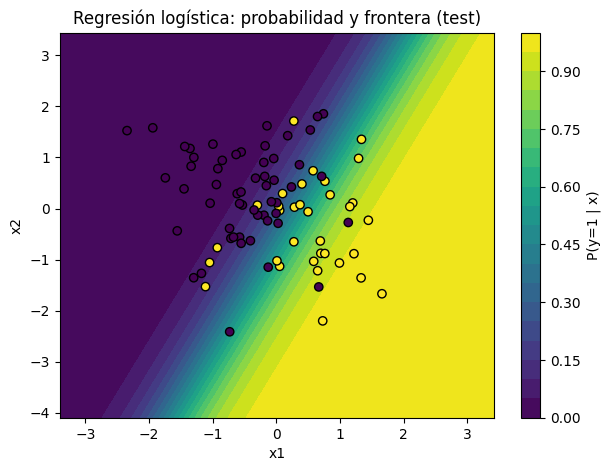

In [37]:
Xtr, Xte, ytr, yte = train_test_split(X_log, y_log, test_size=0.25, random_state=2909, stratify=y_log)

# Pipeline típico: escalar + logística
log_model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(solver="lbfgs", max_iter=2000))
])

log_model.fit(Xtr, ytr)

proba_te = log_model.predict_proba(Xte)[:, 1]
pred_te = (proba_te >= 0.5).astype(int)

#lo mismo pero para el train set
proba_tr = log_model.predict_proba(Xtr)[:, 1]
pred_tr = (proba_tr >= 0.5).astype(int)


print("\n=== REGRESIÓN LOGÍSTICA ===")
print(f"Accuracy test: {accuracy_score(yte, pred_te):.3f}")
print(f"ROC-AUC  test: {roc_auc_score(yte, proba_te):.3f}")
#para el train
print(f"Accuracy train: {accuracy_score(ytr, pred_tr):.3f}")
print(f"ROC-AUC  train: {roc_auc_score(ytr, proba_tr):.3f}")


print("Matriz de confusión (test):")
#en porcentaje
print(np.round(confusion_matrix(yte, pred_te)/len(yte)*100,1))
print("Matriz de confusión (train):")
print(np.round(confusion_matrix(ytr, pred_tr)/len(ytr)*100,1))

# Frontera de decisión (en el espacio original)
# Creamos malla sobre X1-X2 y evaluamos proba
x1_min, x1_max = X_log[:, 0].min() - 0.5, X_log[:, 0].max() + 0.5
x2_min, x2_max = X_log[:, 1].min() - 0.5, X_log[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 250),
                       np.linspace(x2_min, x2_max, 250))
grid = np.c_[xx1.ravel(), xx2.ravel()]
grid_proba = log_model.predict_proba(grid)[:, 1].reshape(xx1.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx1, xx2, grid_proba, levels=20)
plt.colorbar(label="P(y=1 | x)")
plt.scatter(Xte[:, 0], Xte[:, 1], c=yte, edgecolor="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Regresión logística: probabilidad y frontera (test)")
plt.show()

## Datos reales

In [38]:
import statsmodels.api as sm

In [40]:
# fitting the model
#Para los datos aqui usamos este dataset: https://media.geeksforgeeks.org/wp-content/cdn-uploads/20220522225116/headbrain11.csv
df1=pd.read_csv("https://media.geeksforgeeks.org/wp-content/cdn-uploads/20220522225116/headbrain11.csv")
df1.head()

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


In [41]:
X,y=df1["Head Size(cm^3)"],df1["Brain Weight(grams)"]
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.params

const              325.573421
Head Size(cm^3)      0.263429
dtype: float64

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Brain Weight(grams)   R-squared:                       0.639
Model:                             OLS   Adj. R-squared:                  0.638
Method:                  Least Squares   F-statistic:                     416.5
Date:                 Sat, 31 Jan 2026   Prob (F-statistic):           5.96e-54
Time:                         16:17:41   Log-Likelihood:                -1350.3
No. Observations:                  237   AIC:                             2705.
Df Residuals:                      235   BIC:                             2711.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             325.5734     47.141      6.906      0.000     232.701     418.446
Head Size(cm^3)     0.2634      0.013     20.409      0.000       0.238       0.289
==============================================================================
Omnibus:                        8.329   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.665
Skew:                           0.366   Prob(JB):                       0.0131
Kurtosis:                       3.584   Cond. No.                     3.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

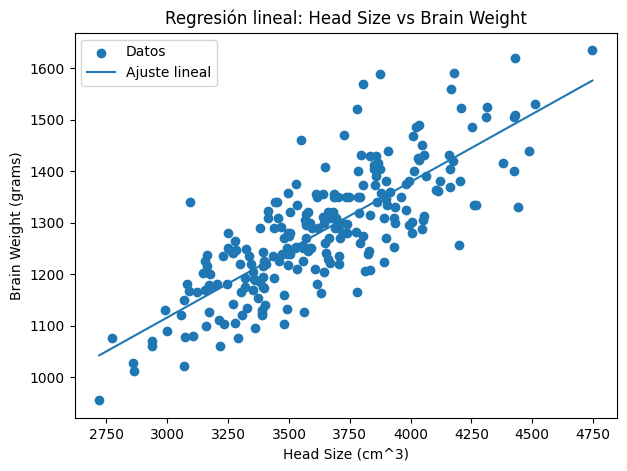

In [43]:
# Grid para la recta: debe tener const + x
x_grid = np.linspace(df1["Head Size(cm^3)"].min(),
                     df1["Head Size(cm^3)"].max(), 200)
X_grid = sm.add_constant(pd.DataFrame({"Head Size(cm^3)": x_grid}))

y_grid = results.predict(X_grid)

plt.figure(figsize=(7,5))
plt.scatter(df1["Head Size(cm^3)"], y, label="Datos")
plt.plot(x_grid, y_grid, label="Ajuste lineal")
plt.xlabel("Head Size (cm^3)")
plt.ylabel("Brain Weight (grams)")
plt.title("Regresión lineal: Head Size vs Brain Weight")
plt.legend()
plt.show()

y para la regresión logística:

In [45]:
#Para los datos aqui usamos este dataset: https://media.geeksforgeeks.org/wp-content/uploads/20251025141423714536/logit_train1.csv
df = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/20251025141423714536/logit_train1.csv', index_col = 0)

#Define Dependent and Independent Variable
#Defining dependent and independent variables for training.
Xtrain = df[['gmat', 'gpa', 'work_experience']]
ytrain = df[['admitted']]
df.head()

,gmat,gpa,work_experience,admitted
16,580,2.7,4,0
33,660,3.3,6,1
8,740,3.3,5,1
38,590,1.7,4,0
32,660,4.0,4,1


In [46]:
len(df)

30

In [47]:
Xtrain = df[['gmat', 'gpa', 'work_experience']][0:15]
ytrain = df[['admitted']][0:15]
Xtest = df[['gmat', 'gpa', 'work_experience']][15:]
ytest = df[['admitted']][15:]


log_reg = sm.Logit(ytrain, Xtrain).fit()
#Perform Predictions
#Performing predictions on testing data.
yhat = log_reg.predict(Xtest)
prediction = list(map(round, yhat))

print('Actual values', list(ytest.values))
print('Predictions :', prediction)

Optimization terminated successfully.
         Current function value: 0.440047
         Iterations 7
Actual values [array([0]), array([0]), array([1]), array([1]), array([1]), array([1]), array([0]), array([0]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([0])]
Predictions : [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]


In [48]:
from sklearn.metrics import (confusion_matrix, accuracy_score)
cm = confusion_matrix(ytest, prediction) 
print ("Confusion Matrix : \n", cm) 
print('Test accuracy = ', accuracy_score(ytest, prediction)) 

Confusion Matrix : 
 [[6 0]
 [2 7]]
Test accuracy =  0.8666666666666667
